In [17]:
# Ramberg--Osgood Nonlinearity

In [60]:
# Import packages
import sympy as sp
import numpy as np
# import plotting package for plotting matplotlib
import matplotlib.pyplot as plt
sp.init_printing()  # Makes output display nicely in Jupyter

In [61]:
# Define symbols
E,m,sigma,sigma_0,L,delta,alpha = sp.symbols('E,m,sigma,sigma_0,L,delta,alpha')

In [62]:
sigma_0

In [46]:
# Define nonlinear function f
f_sym= sigma/E + alpha*(sigma/sigma_0)**m-delta/L
display(f_sym)

alpha*(sigma/sigma_0)**m - delta/L + sigma/E

In [47]:
# Compute f' 
fp_sym = sp.diff(f_sym,sigma)
display(fp_sym)


alpha*m*(sigma/sigma_0)**m/sigma + 1/E

## Note on derivation of $f'(\sigma)$:
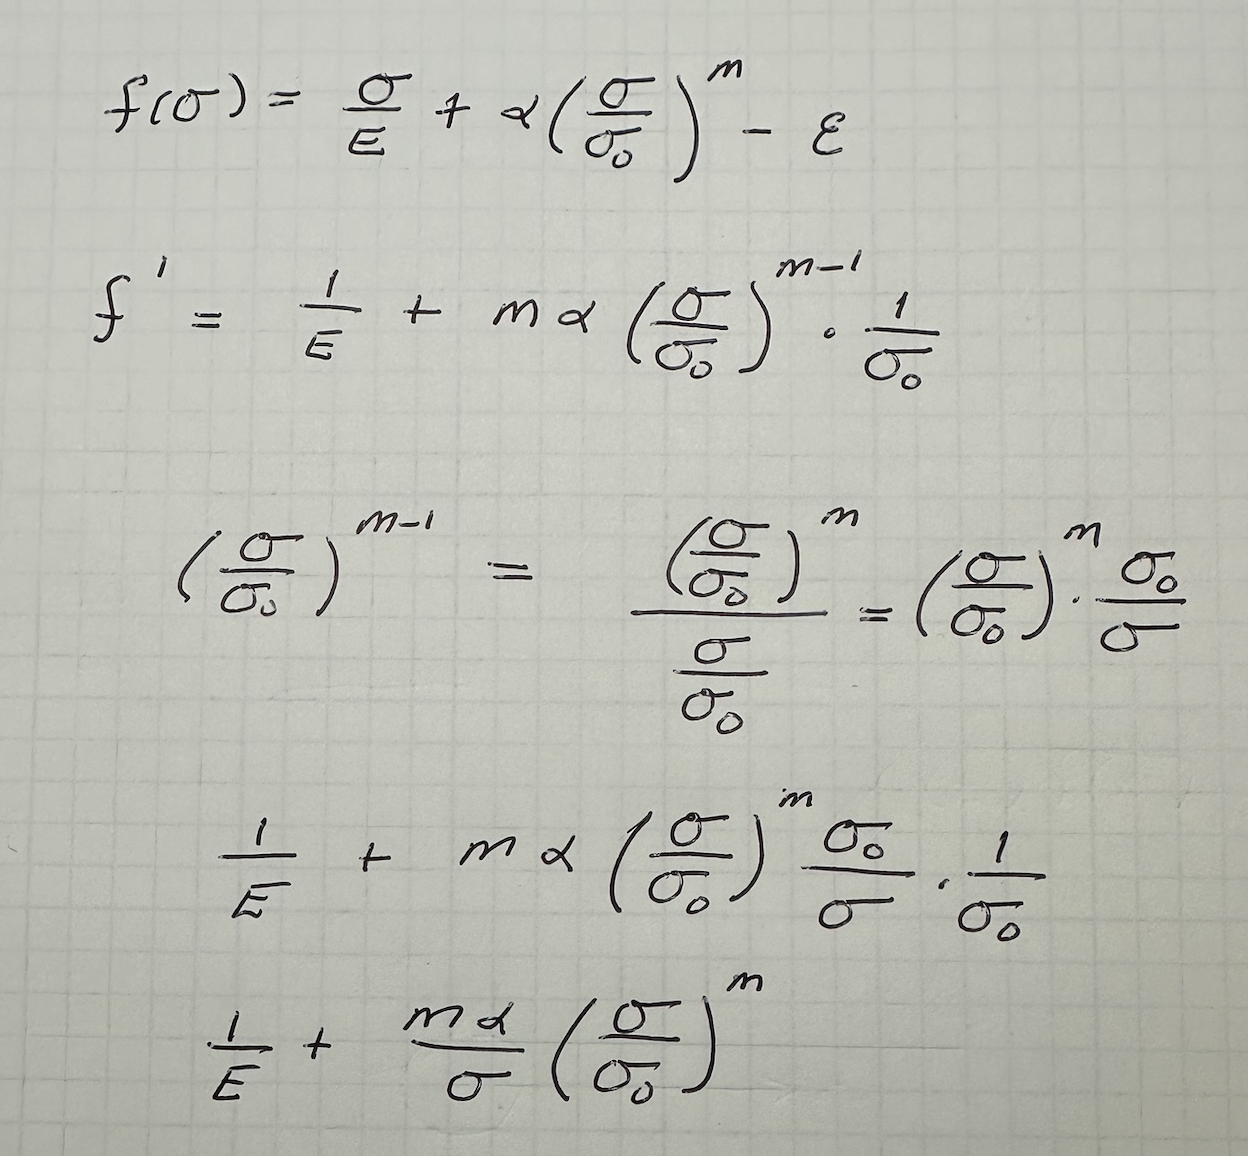

In [48]:
# Create a paramter dictionary
params = {E: 30.0e6, m: 4, alpha: 0.002, sigma_0: 30000., delta: 0.1, L: 120.0}

In [49]:
params

{E: 30000000.0, m: 4, alpha: 0.002, sigma_0: 30000.0, delta: 0.1, L: 120.0}

In [50]:
# Substitute my dictionary into my symbolic expressions.
fi_sym = f_sym.subs(params)
fpi_sym = fp_sym.subs(params)


In [51]:

fpi_sym

9.87654320987654e-21*sigma**3 + 3.33333333333333e-8

In [52]:
f_np  = sp.lambdify(sigma, fi_sym,  modules='numpy')
fp_np = sp.lambdify(sigma, fpi_sym, modules='numpy')





In [53]:
f_np(10000.)

-0.00047530864197530855

In [54]:
# Numerical implementation of Newton's method
# number of iterations
niter = 8
tol = 1.e-12
# initial guess for sigma
sigmai = 0.0

residuals = []
iter = []
stress = []

# Loop over number of iterations
for i in range(niter):
    # compute fi at sigmai
    fi = f_np(sigmai)
    # compute fpi at sigmai
    fpi = fp_np(sigmai)
    # check for convergence
    ## compute ri = abs(fi) Is ri < tol? If so break
    ri = abs(fi)
    residuals.append(ri)
    iter.append(i)
    stress.append(sigmai)
    if ri < tol:
        break
    # compute increment
    dsigmai = -fi/fpi
    # update sigmai
    sigmai = sigmai + dsigmai

In [55]:
print(residuals)

[0.000833333333333333, 0.0009645061728395101, 0.00021280412225723594, 2.023393142319555e-05, 2.371539351771505e-07, 3.3582105304040544e-11, 7.589415207398531e-19]


In [56]:
stress

[0.0,
 25000.000000000015,
 19860.197368421053,
 17937.85302722803,
 17713.874670999227,
 17711.18676395629,
 17711.186383228276]

In [57]:
f_np(17711)

-1.6439765951662376e-08

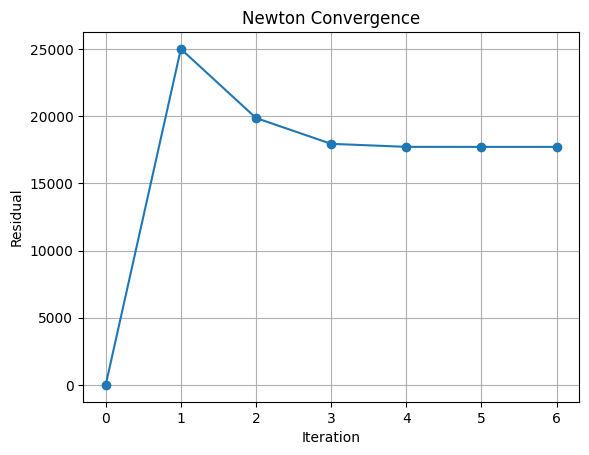

In [59]:
plt.figure()
#plt.plot(iter, residual, marker='o')
plt.plot(iter, stress, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Residual')
plt.title('Newton Convergence')
plt.grid(True)
plt.show()
